In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Reel Good Data (Title+Service+Genre+Tag List).csv")

C:\Users\Johnson Liu\AppData\Local\Temp\ipykernel_37108\1642413773.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Reel Good Data (Title+Service+Genre+Tag List).csv")


In [3]:
df

,Unnamed: 0,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287829,287829,Antes de Morir,/movie/antes-de-morir-2000,movies,plutotv,Drama,"[nan, nan, nan, nan]",NaN,12.0,13+,NaN,2000,NaN,NaN,NaN,NaN,0,0,0
287830,287830,Kurdish Factor: The Untold Story Of The Gulf Wars,/movie/kurdish-factor-the-untold-story-of-the-...,movies,amazon_prime,Documentary,[nan],NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN,1,0,0
287831,287831,Latex - Fetish or Fashion?,/movie/latex-fetish-or-fashion-2017-1,movies,hoopla,Documentary,[nan],NaN,12.0,NaN,NaN,2017,NaN,NaN,NaN,NaN,0,1,0
287832,287832,Macbeth,/movie/macbeth-1997-1,movies,hoopla,Drama,[nan],NaN,10.0,NaN,NaN,1997,NaN,NaN,NaN,NaN,0,1,0


In [4]:
df['IMDB'].isnull().sum()

4522

In [5]:
df['ReelGood'].isnull().sum()

930

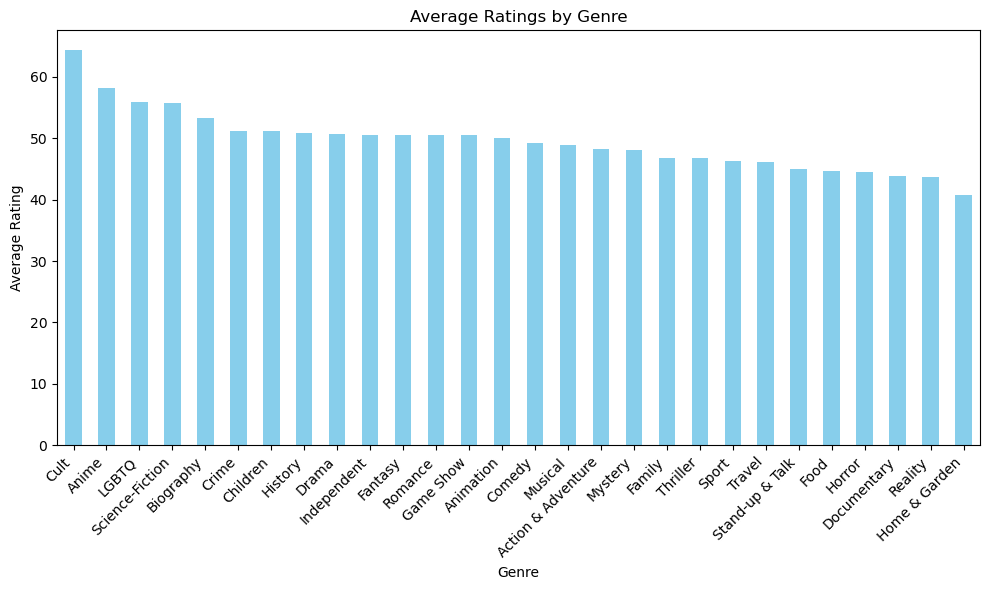

In [6]:
genre_ratings = df.groupby('Genre')['ReelGood'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
(df['Exclusive Service'].sum() / len(df)) * 100

20.481944454095068

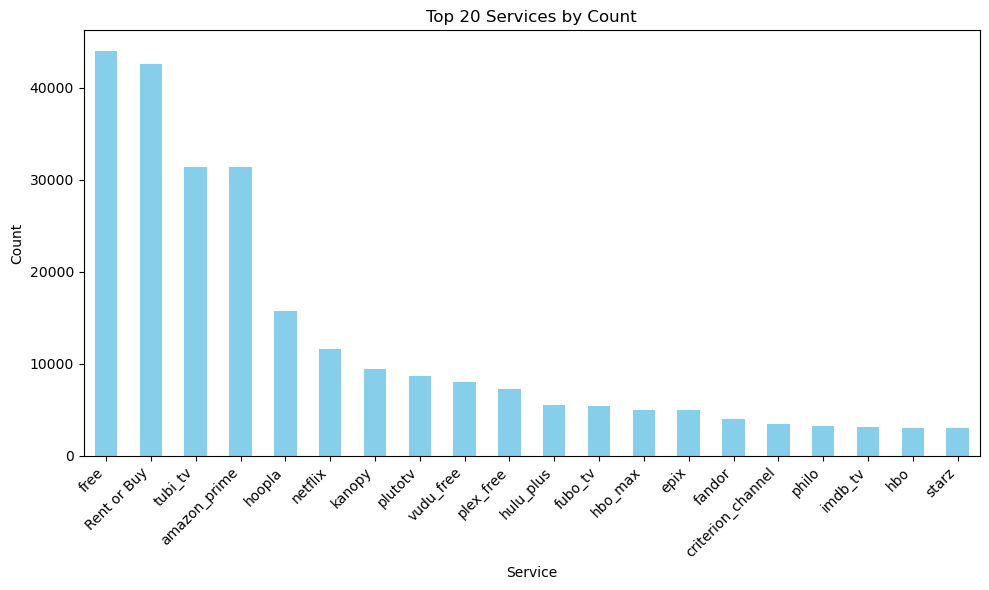

In [8]:
service_counts = df['Service'].value_counts()
plt.figure(figsize=(10, 6))
service_counts.head(20).plot(kind='bar', color='skyblue')  # Plotting only the top 20 services
plt.title('Top 20 Services by Count')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# what type of content is sought after by streaming platforms
# look at genre

In [10]:
genre_counts = df['Genre'].value_counts()
genre_counts

Drama                 54598
Comedy                35610
Action & Adventure    28895
Documentary           22730
Thriller              18564
Horror                15736
Romance               15277
Crime                 14989
Mystery               13225
Family                11573
Animation              8791
Fantasy                6369
Biography              5643
Science-Fiction        5162
Reality                4962
History                4897
Musical                4745
Sport                  2965
Independent            2682
Anime                  1957
LGBTQ                  1781
Children               1585
Stand-up & Talk        1397
Cult                   1019
Food                    791
Game Show               713
Home & Garden           665
Travel                  513
Name: Genre, dtype: int64

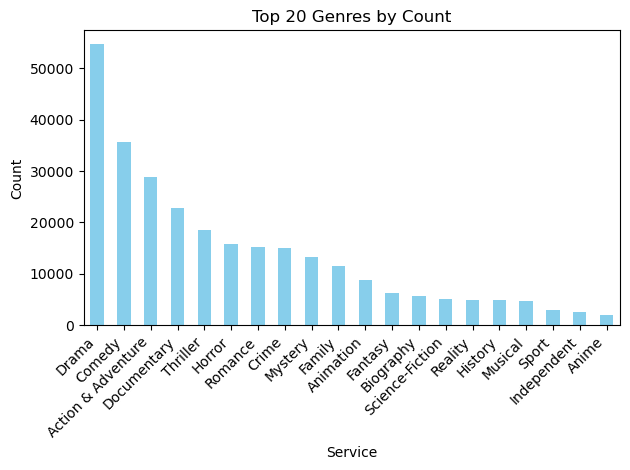

In [11]:
genre_counts.head(20).plot(kind='bar', color='skyblue')  # Plotting only the top 20 services
plt.title('Top 20 Genres by Count')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Which TV shows are successful in the streaming space? 
# filter "successful" based on rating

In [13]:
successful_shows = df[(df['IMDB'] > 6.3) & (df['ReelGood'] > 46) & (df['Type']=='tv')]

In [14]:
successful_shows

,Unnamed: 0,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,41342,Warriors of Liberty City,/show/warriors-of-liberty-city,tv,starz,Reality,['Sports'],6.7,48.0,18+,TV-MA,2018,2018-2020,1.0,A season with a youth football program called ...,6 episodes (100%) are available to stream on a...,1,0,1
41565,41565,The Jack and Triumph Show,/show/the-jack-and-triumph-show-2015,tv,Rent or Buy,Comedy,[nan],7.0,48.0,16+,NaN,2015,NaN,NaN,NaN,NaN,1,1,0
41800,41800,Brainiac: Science Abuse,/show/brainiac-science-abuse-2003,tv,Rent or Buy,Comedy,[nan],6.9,49.0,NaN,NaN,2003,NaN,NaN,NaN,NaN,1,1,0
41801,41801,Brainiac: Science Abuse,/show/brainiac-science-abuse-2003,tv,Rent or Buy,Documentary,[nan],6.9,49.0,NaN,NaN,2003,NaN,NaN,NaN,NaN,1,1,0


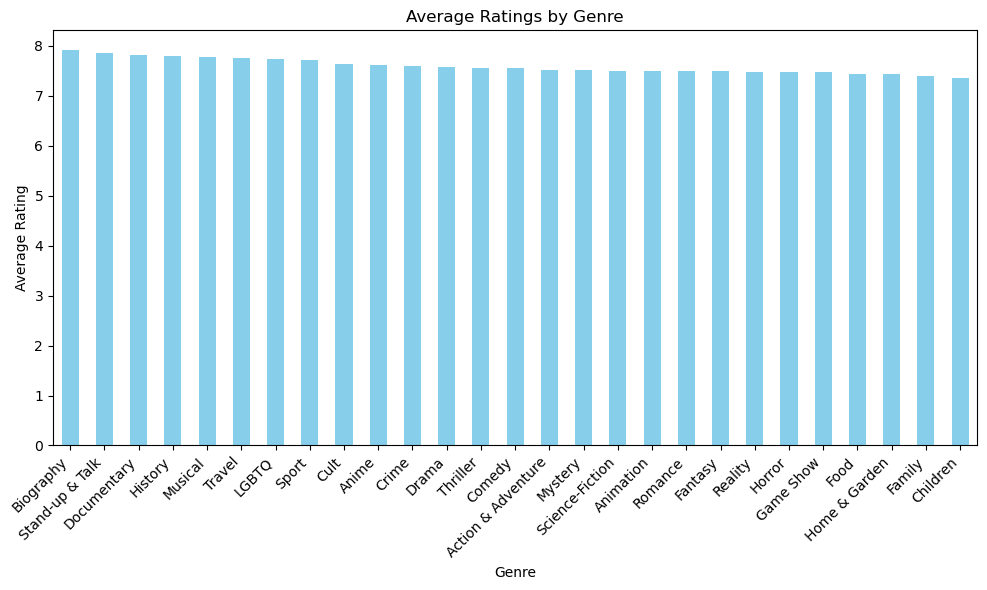

In [15]:
genre_ratings = successful_shows.groupby('Genre')['IMDB'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

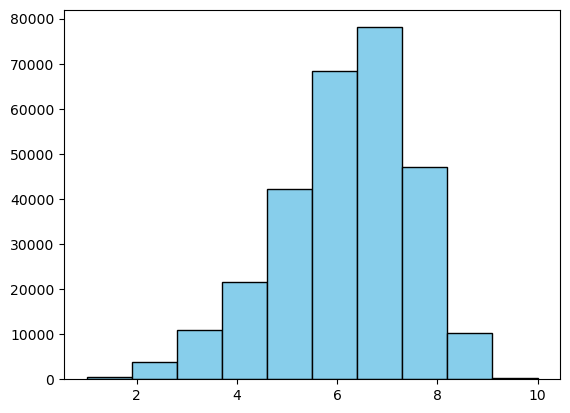

In [16]:
plt.hist(df['IMDB'], bins=10, color='skyblue', edgecolor='black')
plt.show()

In [17]:
df['IMDB'].median()

6.3

In [18]:
df['ReelGood'].median()

46.0

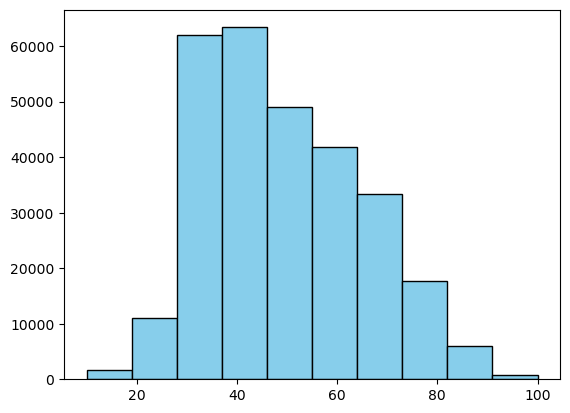

In [19]:
plt.hist(df['ReelGood'], bins=10, color='skyblue', edgecolor='black')
plt.show()

In [20]:
# What type of content is sought after by streaming platforms?


In [21]:
netflix = pd.read_excel('Netflix catalogue USA 2016-2020.xlsx')

In [22]:
netflix

,YearMonth,Platform,Country,Content Type,Title,First Release Year,Primary Genre,SecondaryGenre,Genre,Duration,Duration Group,Number of Episodes,Primary Production Country,Primary Production Company
0,Jan-2016,Netflix,USA,Movie,[rec] 3: Genesis,2012,Horror,Comedy,Horror - Comedy,80,60 - 90 minutes,-,Spain,Filmax
1,Jan-2016,Netflix,USA,Movie,[rec] 4: Apocalypse,2014,Horror,Action & Adventure,Horror - Action & Adventure,95,90 - 120 minutes,-,Spain,Entertainment One
2,Jan-2016,Netflix,USA,Movie,#chicagogirl: the Social Network Takes on a Di...,2015,Documentary,Political,Documentary - Political,73,60 - 90 minutes,-,USA,Revolutio
3,Jan-2016,Netflix,USA,TVSeason,#deathtoselfie With Steven Furtick: Season 1,2014,Miscellaneous,Miscellaneous,Miscellaneous - Miscellaneous,520,45 - 60 minutes,10,USA,No Company Assigned
4,Jan-2016,Netflix,USA,Movie,1 Chance 2 Dance,2014,Romance,Drama,Romance - Drama,85,60 - 90 minutes,-,USA,DAVED Productions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410678,Dec-2020,Netflix,USA,TVSeason,深夜食堂: Season 2,2011,Comedy,Drama,Comedy - Drama,240,15 - 30 minutes,10,Japan,Amuse
410679,Dec-2020,Netflix,USA,TVSeason,王女未央 Biou: Season 1,2017,Drama,Historical,Drama - Historical,2376,30 - 45 minutes,54,China,Ningxia Film Group
410680,Dec-2020,Netflix,USA,TVSeason,王子様をオトせ！: Season 1,2014,Romance,Comedy,Romance - Comedy,1716,30 - 45 minutes,39,China,Sanlih E-Television
410681,Dec-2020,Netflix,USA,TVSeason,聖闘士星矢: Season 1,1986,Sci-Fi & Fantasy,Animation,Sci-Fi & Fantasy - Animation,1752,15 - 30 minutes,73,Japan,Toei Animation


Text(0.5, 1.0, 'Most Popular Genres on Netflix')

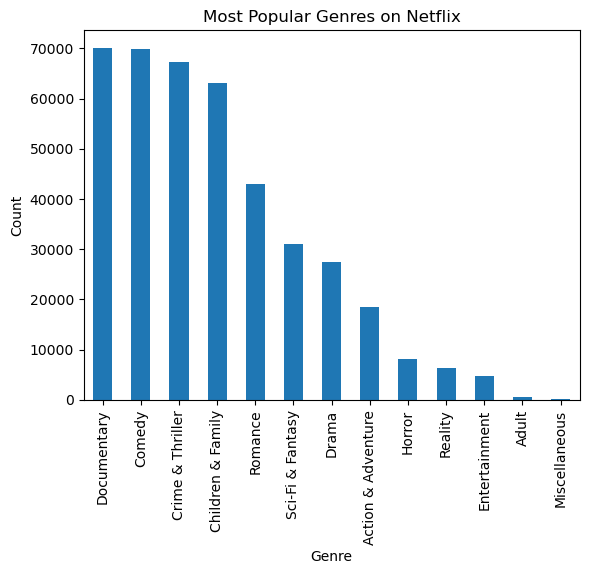

In [23]:
netflix['Primary Genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Popular Genres on Netflix')

In [24]:
hulu = pd.read_excel('Hulu catalogue USA 2016-2020.xlsx')

In [25]:
hulu

,YearMonth,Platform,Country,Content Type,Title,First Release Year,Primary Genre,SecondaryGenre,Genre,Duration,Duration Group,Number of Episodes,Primary Production Country,Primary Production Company
0,May-2016,Hulu,USA,TVSeason,魔界王子 Devils and Realist: Season 1,2013,Sci-Fi & Fantasy,Animation,Sci-Fi & Fantasy - Animation,300,15 - 30 minutes,12,Japan,Dogakobo
1,May-2016,Hulu,USA,TVSeason,魔法遣いに大切なこと~夏のソラ~: Season 1,2008,Sci-Fi & Fantasy,Drama,Sci-Fi & Fantasy - Drama,276,15 - 30 minutes,12,No Country Assigned,TV Asahi
2,May-2016,Hulu,USA,TVSeason,鬼灯の冷徹 第弐期: Season 1,2017,Comedy,Animation,Comedy - Animation,325,15 - 30 minutes,13,Japan,Sentai Filmworks
3,May-2016,Hulu,USA,Movie,雲霧仁左衛門,1978,Comedy,Drama,Comedy - Drama,163,150 - 180 minutes,-,Japan,SHOCHIKU
4,May-2016,Hulu,USA,Movie,陽炎,1991,Action & Adventure,Drama,Action & Adventure - Drama,109,90 - 120 minutes,-,Japan,Bandai Entertainment Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331459,Dec-2020,Hulu,USA,Movie,2 Days in Paris,2007,Romance,Comedy,Romance - Comedy,96,90 - 120 minutes,-,France,3L Film
331460,Dec-2020,Hulu,USA,TVSeason,$ellebrity: the Go-to Girls - a Special Editio...,2020,News & Current Affairs,Miscellaneous,News & Current Affairs - Miscellaneous,80,60 - 90 minutes,1,No Country Assigned,No Company Assigned
331461,Dec-2020,Hulu,USA,TVSeason,**** That's Delicious: Season 4,2020,Reality,Food,Reality - Food,242,15 - 30 minutes,11,USA,VICE Media LLC
331462,Dec-2020,Hulu,USA,TVSeason,"""WTF, Baron Davis"": Season 1",2019,Comedy,Miscellaneous,Comedy - Miscellaneous,88,0 - 15 minutes,8,USA,No Label


Text(0.5, 1.0, 'Most Popular Genres on Hulu')

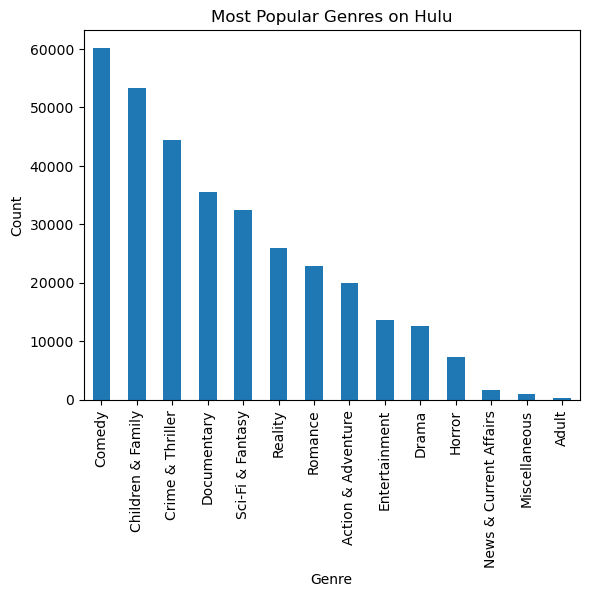

In [26]:
hulu['Primary Genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Popular Genres on Hulu')

In [27]:
amazon = pd.read_excel('Amazon Prime (excluding Amazon Other) catalogue USA 2016-2020.xlsx')

Text(0.5, 1.0, 'Most Popular Genres on Amazon Prime')

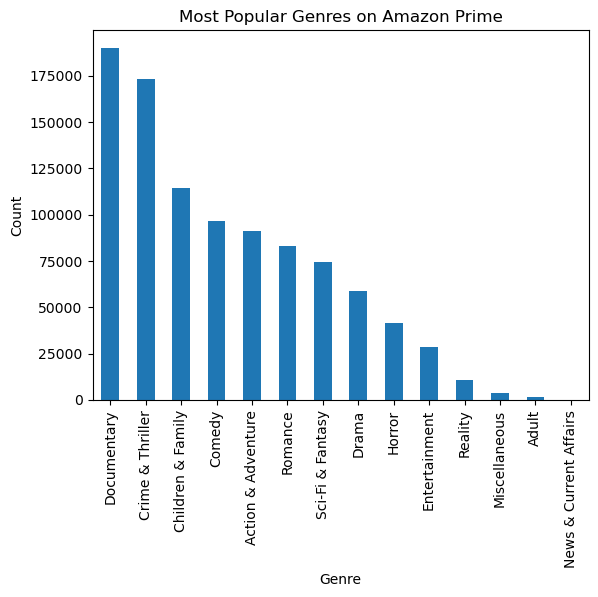

In [28]:
amazon['Primary Genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Popular Genres on Amazon Prime')

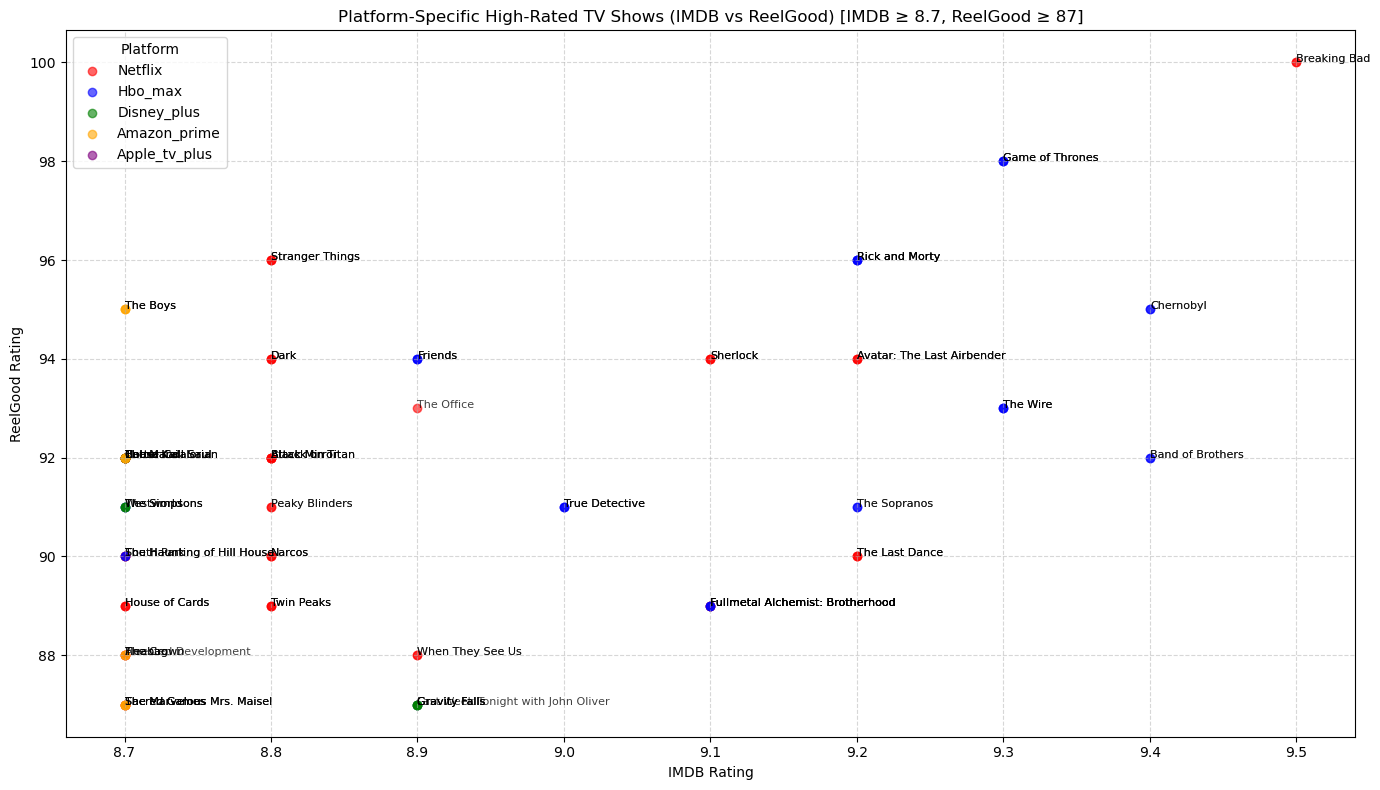

In [12]:
###slides4-question3
import pandas as pd
import matplotlib.pyplot as plt


# Extract high-rated content with IMDB ≥ 8.7 and ReelGood ≥ 87
high_rated_content = df[(df['IMDB'] >= 8.7) & (df['ReelGood'] >= 87.0)]

# Analyze successful TV shows specifically
successful_tv_shows = high_rated_content[high_rated_content['Type'] == 'tv']

# Filter to include specific platforms only
platforms_of_interest = ['netflix', 'hbo_max', 'disney_plus', 'amazon_prime', 'apple_tv_plus']
colors = {'netflix': 'red', 'hbo_max': 'blue', 'disney_plus': 'green', 'amazon_prime': 'orange', 'apple_tv_plus': 'purple'}

exclusive_successful_tv = successful_tv_shows[successful_tv_shows['Service'].isin(platforms_of_interest)]

# Create a scatter plot for platform-specific high-rated TV shows
plt.figure(figsize=(14, 8))
for platform, color in colors.items():
    data = exclusive_successful_tv[(exclusive_successful_tv['Service'] == platform) & (exclusive_successful_tv['IMDB'] >= 8.7) & (exclusive_successful_tv['ReelGood'] >= 87)]
    plt.scatter(data['IMDB'], data['ReelGood'], label=platform.capitalize(), color=color, alpha=0.6)
    # Add labels to each TV show
    for _, row in data.iterrows():
        plt.text(row['IMDB'], row['ReelGood'], row['Title'], fontsize=8, alpha=0.75)

plt.title('Platform-Specific High-Rated TV Shows (IMDB vs ReelGood) [IMDB ≥ 8.7, ReelGood ≥ 87]')
plt.xlabel('IMDB Rating')
plt.ylabel('ReelGood Rating')
plt.legend(title='Platform')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

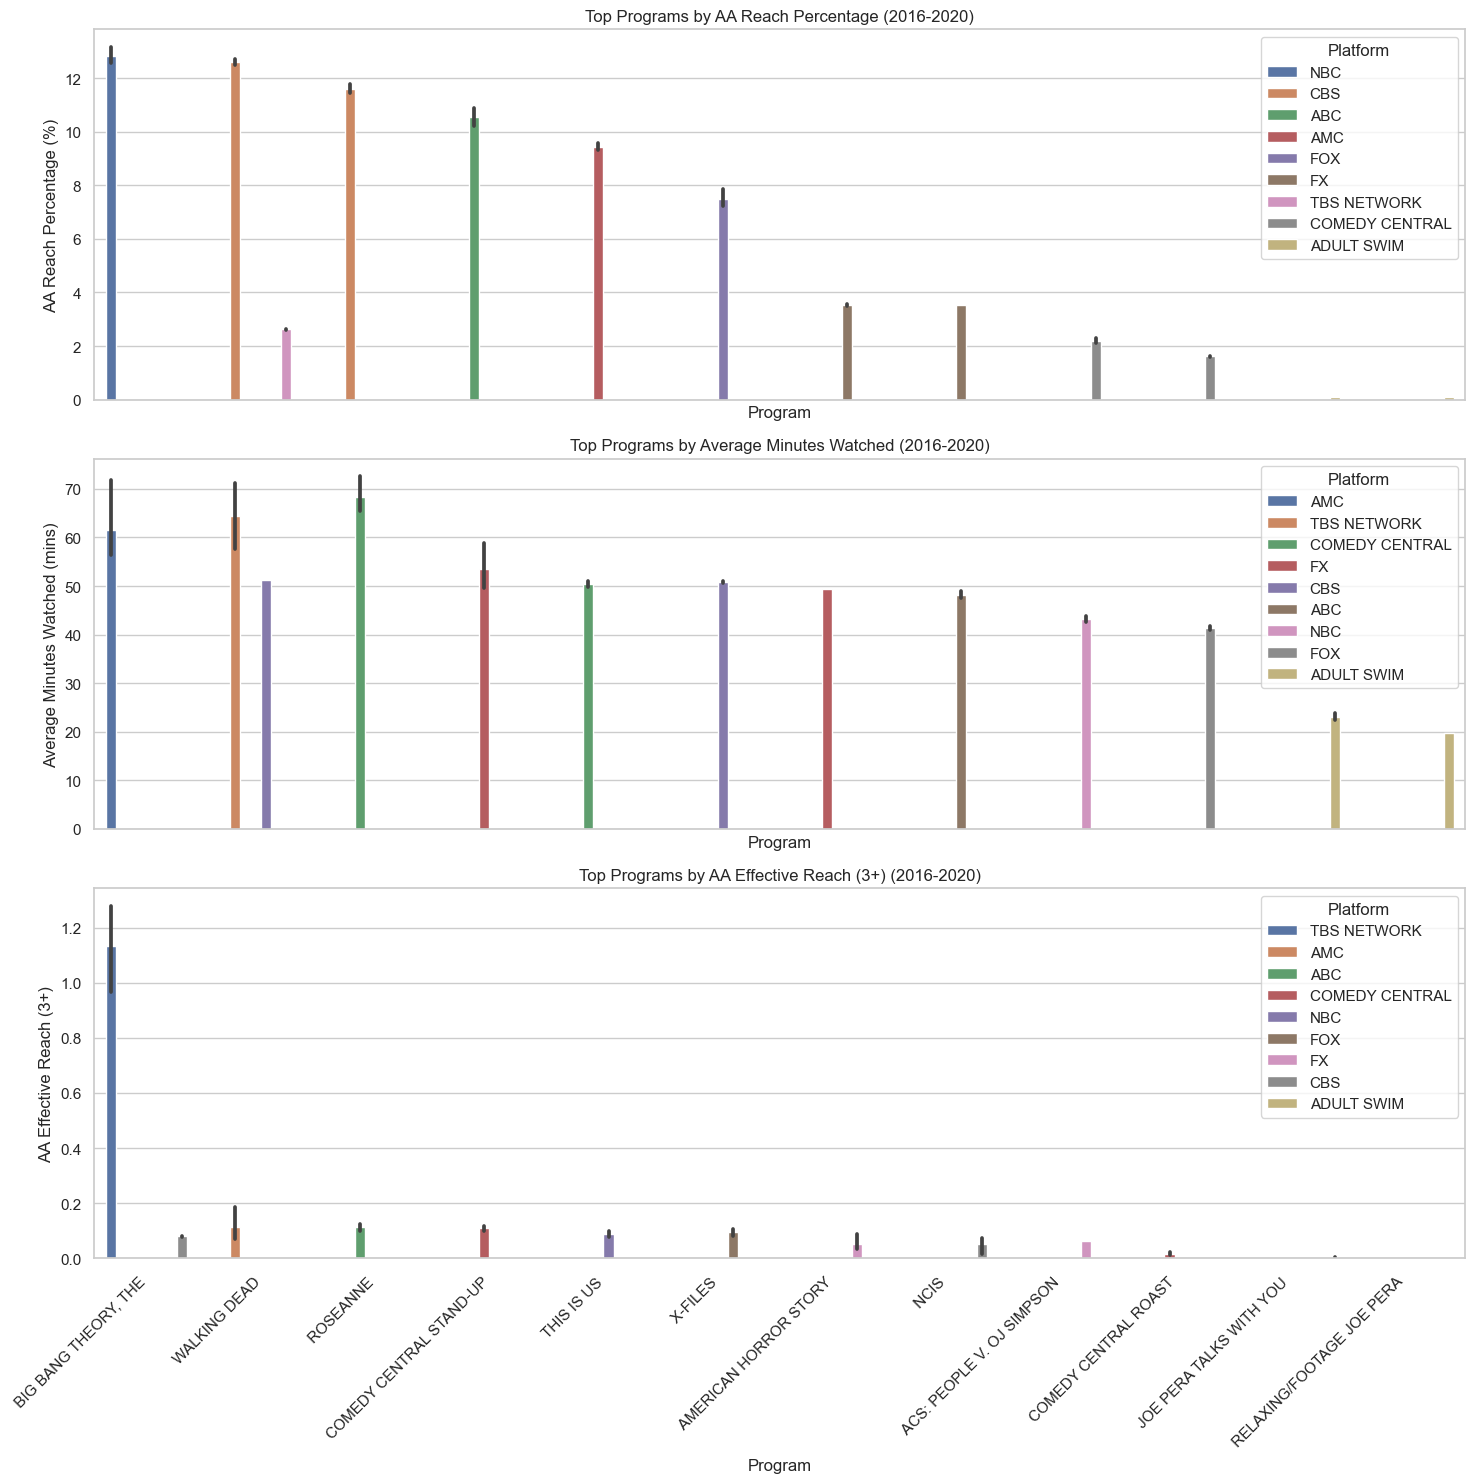

In [19]:
###slides5-question3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
reach_data = pd.read_csv('Reach Data 2016 to 2020.csv')

# Clean up column names
reach_data.columns = [
    'Index', 'Coverage_Area', 'Market_Break', 'Demographic',
    'Schedule_Name', 'Date', 'Originator', 'Program',
    'Playback_Period', 'Units', 'AA_Reach_Pct', 'AA_Reach_Proj_Units',
    'AA_Avg_Frequency', 'AA_Avg_Minutes', 'Spot_AA_GRP_Pct',
    'Qualified_AA_GRP_Pct', 'Spot_AA_GRP_Proj_Units',
    'Qualified_AA_GRP_Proj_Units', 'AA_Effective_Reach_3plus',
    'Weighted_Intab', 'PESS', 'Unified_Count', 'UE_000', 'UE_Proj_Type',
    'File'
]

# Convert relevant columns to numeric
reach_data['AA_Reach_Pct'] = pd.to_numeric(reach_data['AA_Reach_Pct'], errors='coerce')
reach_data['AA_Avg_Minutes'] = pd.to_numeric(reach_data['AA_Avg_Minutes'], errors='coerce')
reach_data['AA_Effective_Reach_3plus'] = pd.to_numeric(reach_data['AA_Effective_Reach_3plus'], errors='coerce')

# Strip leading/trailing spaces from Originator values
reach_data['Originator'] = reach_data['Originator'].str.strip()

# Define a function to get the top programs per originator
def top_programs_by_originator(data, top_n=5):
    top_programs = {}
    for originator in data['Originator'].unique():
        top_programs[originator] = data[data['Originator'] == originator].sort_values(
            by=['AA_Reach_Pct', 'AA_Avg_Minutes', 'AA_Effective_Reach_3plus'],
            ascending=False
        ).head(top_n)
    return top_programs

# Get top 5 programs per originator
top_programs_platforms = top_programs_by_originator(reach_data, top_n=5)

# Prepare data for visualization
platforms = ['COMEDY CENTRAL', 'AMC', 'CBS', 'NBC', 'FOX', 'FX', 'ADULT SWIM']
programs_summary = {
    platform: data[['Program', 'AA_Reach_Pct', 'AA_Avg_Minutes', 'AA_Effective_Reach_3plus']].assign(Platform=platform)
    for platform, data in top_programs_platforms.items()
}

# Combine into a single DataFrame
all_programs_df = pd.concat(programs_summary.values())

# Plot setup
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Reach Percentage Plot
sns.barplot(
    x='Program', y='AA_Reach_Pct', hue='Platform',
    data=all_programs_df.sort_values(by='AA_Reach_Pct', ascending=False),
    ax=axs[0]
)
axs[0].set_title('Top Programs by AA Reach Percentage (2016-2020)')
axs[0].set_ylabel('AA Reach Percentage (%)')
axs[0].legend(title='Platform')

# Average Minutes Watched Plot
sns.barplot(
    x='Program', y='AA_Avg_Minutes', hue='Platform',
    data=all_programs_df.sort_values(by='AA_Avg_Minutes', ascending=False),
    ax=axs[1]
)
axs[1].set_title('Top Programs by Average Minutes Watched (2016-2020)')
axs[1].set_ylabel('Average Minutes Watched (mins)')
axs[1].legend(title='Platform')

# Effective Reach (3+) Plot
sns.barplot(
    x='Program', y='AA_Effective_Reach_3plus', hue='Platform',
    data=all_programs_df.sort_values(by='AA_Effective_Reach_3plus', ascending=False),
    ax=axs[2]
)
axs[2].set_title('Top Programs by AA Effective Reach (3+) (2016-2020)')
axs[2].set_ylabel('AA Effective Reach (3+)')
axs[2].legend(title='Platform')

# Adjust x-axis
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd


netflix_df = pd.read_excel('Netflix catalogue USA 2016-2020.xlsx')
prime_df = pd.read_excel('Amazon Prime (excluding Amazon Other) catalogue USA 2016-2020.xlsx')
hulu_df = pd.read_excel('Hulu catalogue USA 2016-2020.xlsx')

print(netflix_df.head())
print(prime_df.head())
print(hulu_df.head())

print(netflix_df.isnull().sum())
print(prime_df.isnull().sum())
print(hulu_df.isnull().sum())

netflix_df.dropna(subset=['Genre'], inplace=True)
prime_df.dropna(subset=['Genre'], inplace=True)
hulu_df.dropna(subset=['Genre'], inplace=True)

netflix_df.drop_duplicates(inplace=True)
prime_df.drop_duplicates(inplace=True)
hulu_df.drop_duplicates(inplace=True)

  YearMonth Platform Country Content Type  \
0  Jan-2016  Netflix     USA        Movie   
1  Jan-2016  Netflix     USA        Movie   
2  Jan-2016  Netflix     USA        Movie   
3  Jan-2016  Netflix     USA     TVSeason   
4  Jan-2016  Netflix     USA        Movie   

                                               Title First Release Year  \
0                                   [rec] 3: Genesis               2012   
1                                [rec] 4: Apocalypse               2014   
2  #chicagogirl: the Social Network Takes on a Di...               2015   
3       #deathtoselfie With Steven Furtick: Season 1               2014   
4                                   1 Chance 2 Dance               2014   

   Primary Genre      SecondaryGenre                          Genre Duration  \
0         Horror              Comedy                Horror - Comedy       80   
1         Horror  Action & Adventure    Horror - Action & Adventure       95   
2    Documentary           Political  

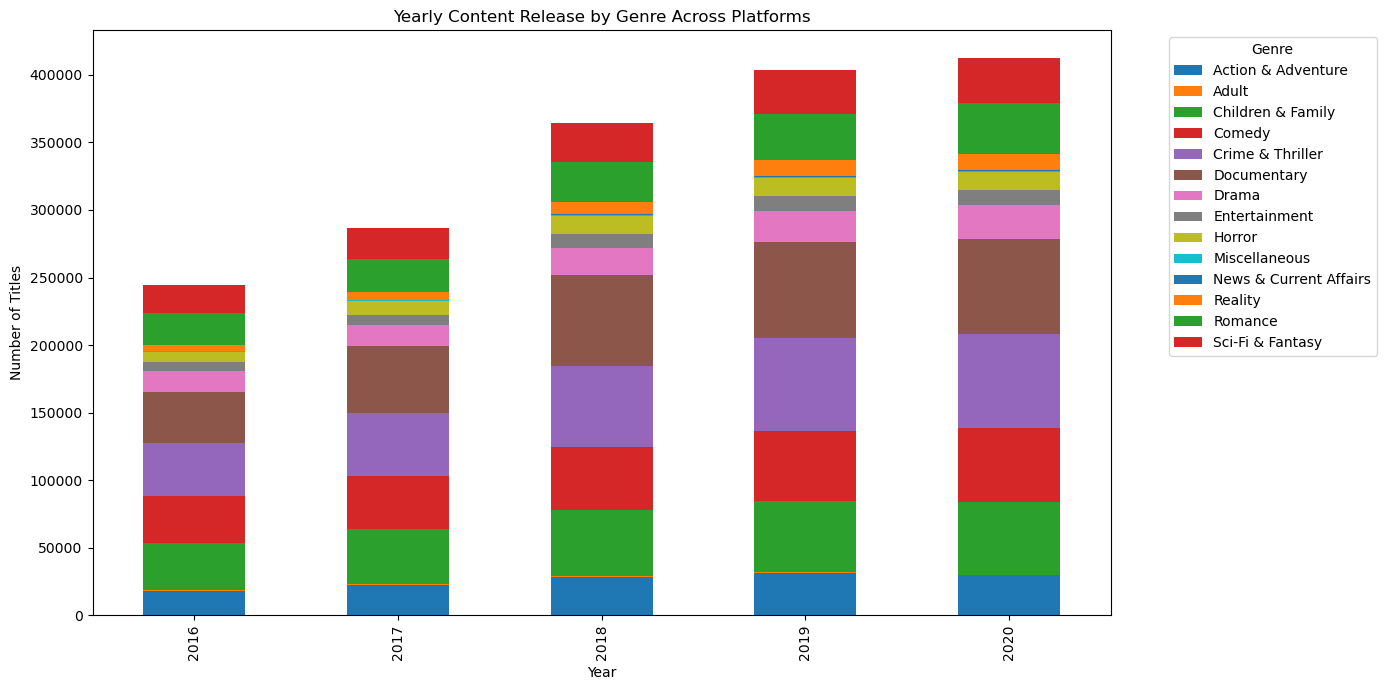

NameError: name 'threshold' is not defined

In [17]:
combined_df = pd.concat([netflix_df, prime_df, hulu_df], ignore_index=True)

combined_df['YearMonth'] = pd.to_datetime(combined_df['YearMonth'], format='%b-%Y')
combined_df['Year'] = combined_df['YearMonth'].dt.year
combined_df['Month'] = combined_df['YearMonth'].dt.month

type_yearly = combined_df.groupby(['Year', 'Primary Genre']).size().unstack(fill_value=0)

type_yearly.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Yearly Content Release by Genre Across Platforms')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

total_by_genre = combined_df.groupby('Primary Genre').size()
low_volume_genres = total_by_genre[total_by_genre < threshold] 

print("Genres with potentially low offerings:")
print(low_volume_genres)

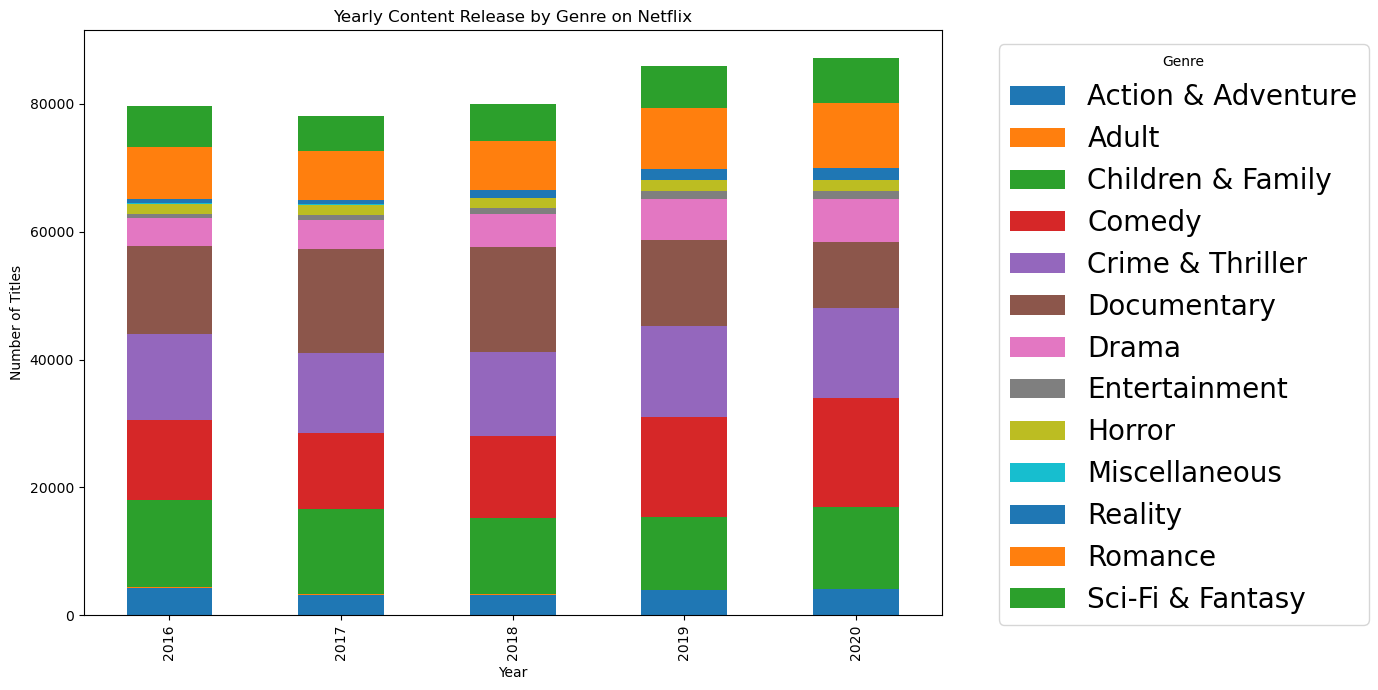

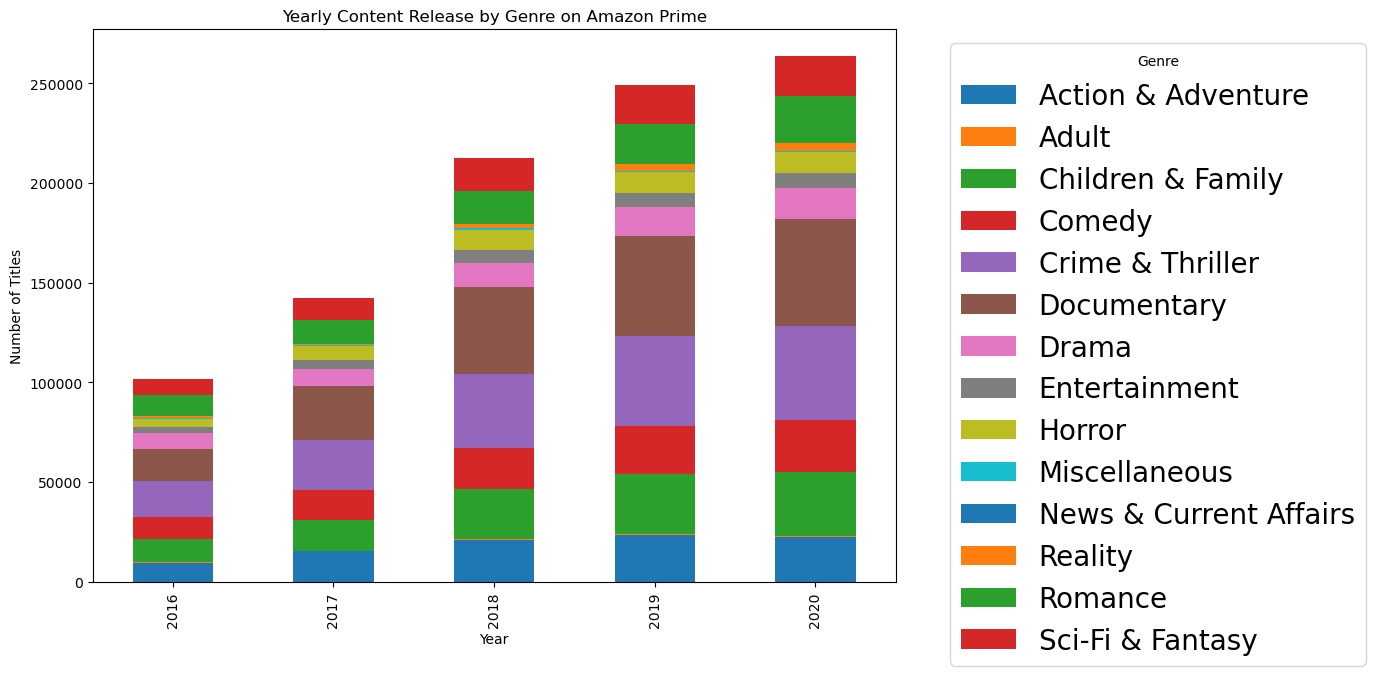

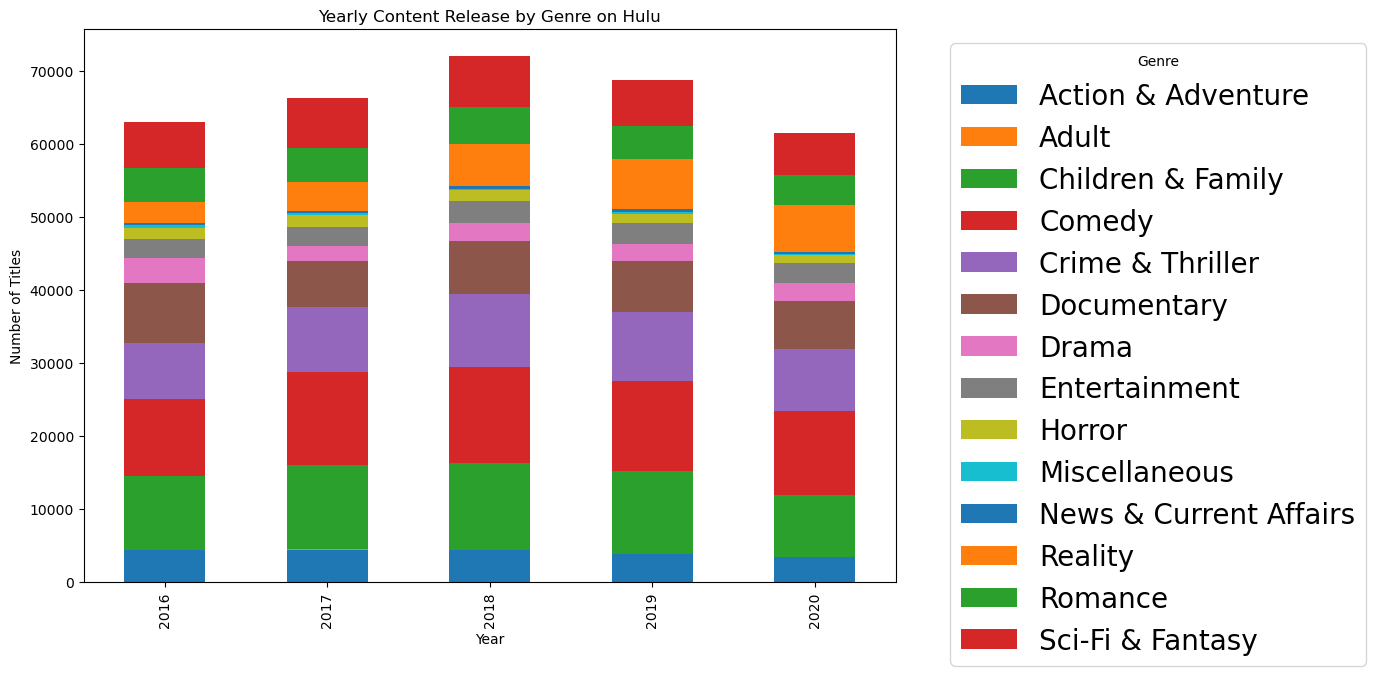

Genres with potentially low offerings on each platform:


NameError: name 'threshold' is not defined

In [18]:
netflix_df['Platform'] = 'Netflix'
prime_df['Platform'] = 'Amazon Prime'
hulu_df['Platform'] = 'Hulu'

combined_df = pd.concat([netflix_df, prime_df, hulu_df], ignore_index=True)

combined_df['YearMonth'] = pd.to_datetime(combined_df['YearMonth'], format='%b-%Y')
combined_df['Year'] = combined_df['YearMonth'].dt.year
combined_df['Month'] = combined_df['YearMonth'].dt.month

for platform in ['Netflix', 'Amazon Prime', 'Hulu']:
    platform_data = combined_df[combined_df['Platform'] == platform]
    type_yearly = platform_data.groupby(['Year', 'Primary Genre']).size().unstack(fill_value=0)
    
    type_yearly.plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title(f'Yearly Content Release by Genre on {platform}')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize= 20)
    plt.tight_layout()
    plt.show()

print("Genres with potentially low offerings on each platform:")
for platform in ['Netflix', 'Amazon Prime', 'Hulu']:
    platform_data = combined_df[combined_df['Platform'] == platform]
    total_by_genre = platform_data['Primary Genre'].value_counts()
    low_volume_genres = total_by_genre[total_by_genre < threshold] 
    print(f"\n{platform}:")
    print(low_volume_genres)